### Clasificación binaria

### EDA WINE

In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

In [51]:
df = pd.read_csv('../../dataset/wine-desvalanceado.csv')
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,Legit,red
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,Legit,red
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,Legit,red
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,Legit,red
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,Legit,red


In [23]:
df.shape

(6497, 13)

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         6497 non-null   float64
 1   volatile acidity      6497 non-null   float64
 2   citric acid           6497 non-null   float64
 3   residual sugar        6497 non-null   float64
 4   chlorides             6497 non-null   float64
 5   free sulfur dioxide   6497 non-null   float64
 6   total sulfur dioxide  6497 non-null   float64
 7   density               6497 non-null   float64
 8   pH                    6497 non-null   float64
 9   sulphates             6497 non-null   float64
 10  alcohol               6497 non-null   float64
 11  quality               6497 non-null   object 
 12  type                  6497 non-null   object 
dtypes: float64(11), object(2)
memory usage: 660.0+ KB


In [25]:
df['type'].value_counts()

white    4898
red      1599
Name: type, dtype: int64

In [26]:
df['quality'].value_counts()

Legit    6251
Fraud     246
Name: quality, dtype: int64

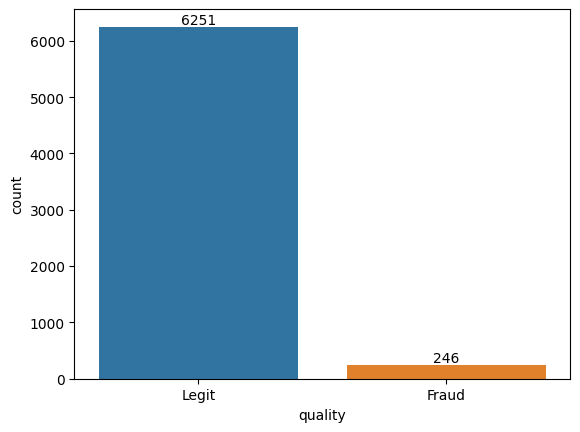

In [27]:
ax = sns.countplot(data=df, x='quality')
ax.bar_label(ax.containers[0]);

In [52]:
df['fraud'] = df['quality'].map({
    'Fraud': 1,
    'Legit': 0
})
df.drop('quality', axis=1, inplace=True)
df = pd.get_dummies(df, drop_first=True)
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,fraud,type_white
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,0,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,0,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,0,0
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0,0


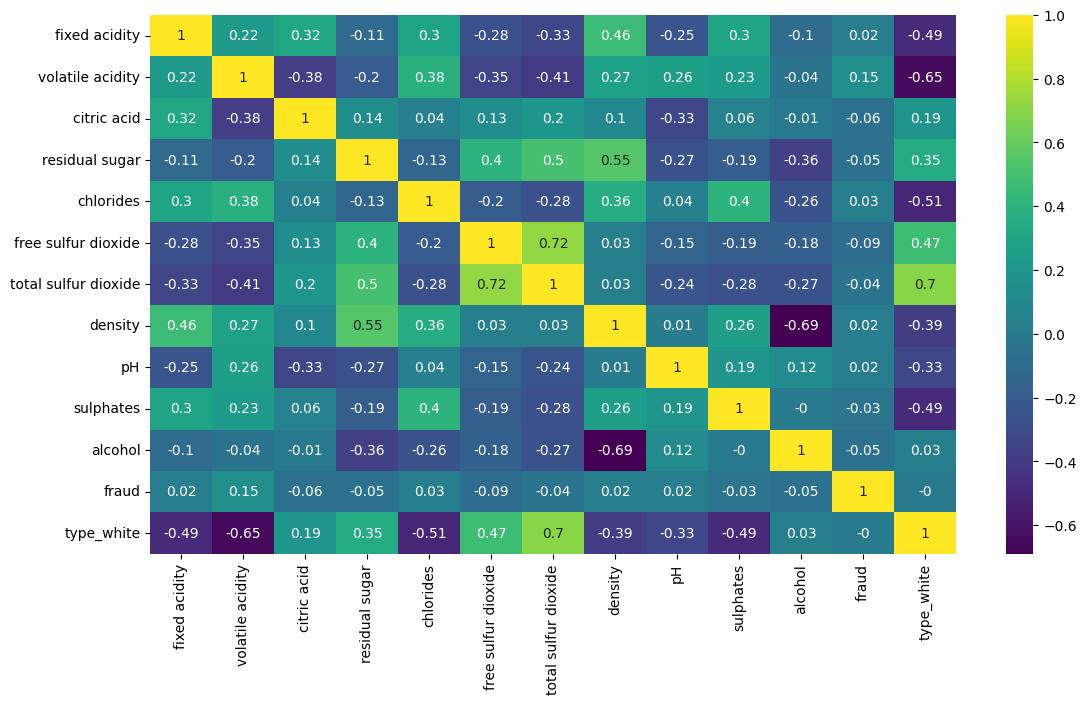

In [53]:
plt.figure(figsize=(13, 7))
df_corr = df.corr(numeric_only=True).round(2)
sns.heatmap(df_corr, cmap='viridis', annot=True);

<Axes: xlabel='volatile acidity', ylabel='free sulfur dioxide'>

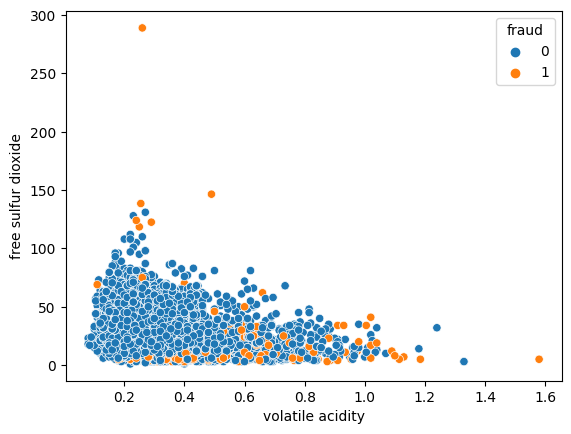

In [54]:
sns.scatterplot(data=df, x='volatile acidity', y='free sulfur dioxide', hue='fraud')

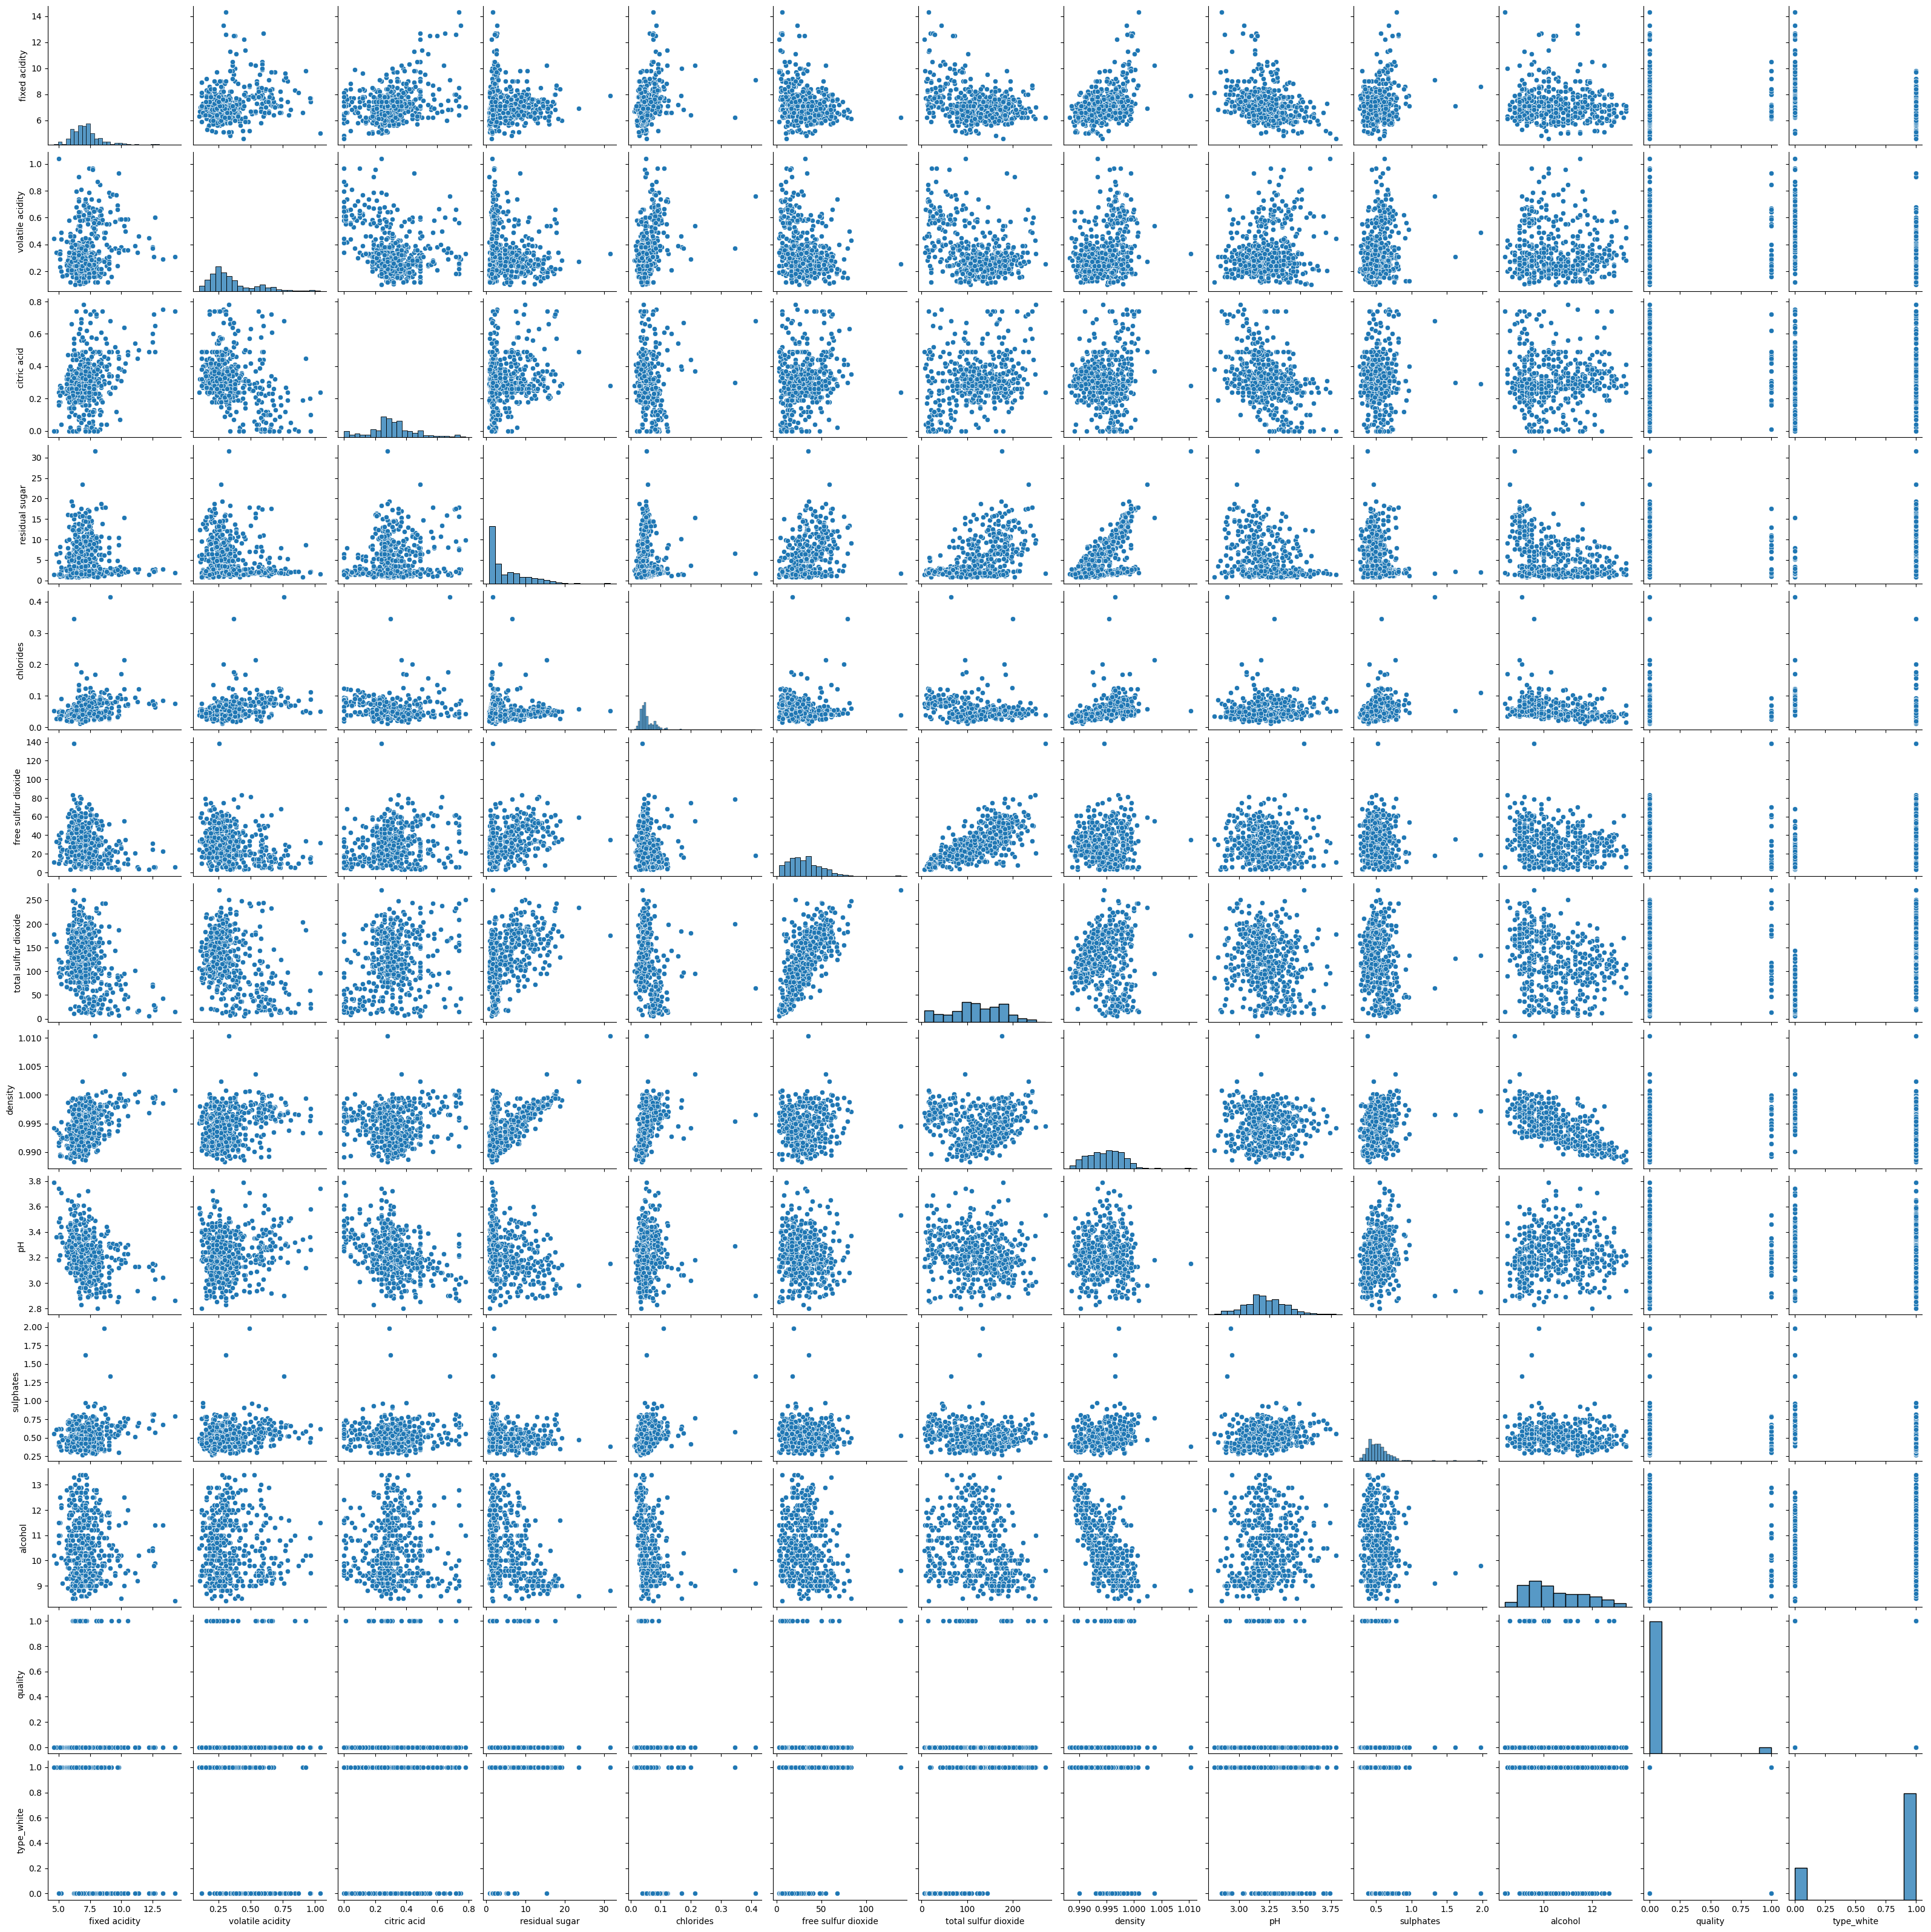

In [43]:
sns.pairplot(df.sample(500))

(0.0, 150.0)

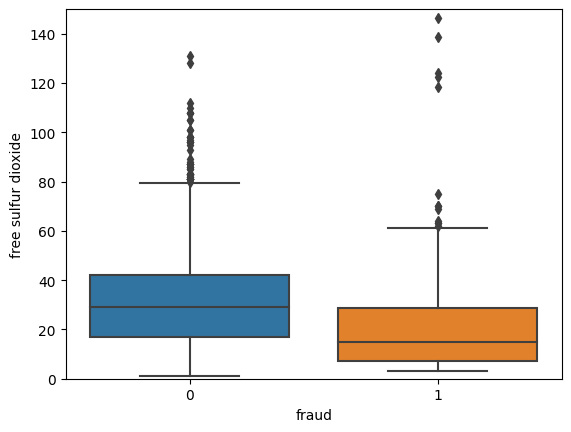

In [63]:
sns.boxplot(data=df, x='fraud', y='free sulfur dioxide')
plt.ylim(0, 150)

In [ ]:
df.corr(numeric_only=True)['fraud'].sort_values(ascending=False)[:1].plot(kind='bar')
plt.xticks(rotation=45);

(0.0, 1.25)

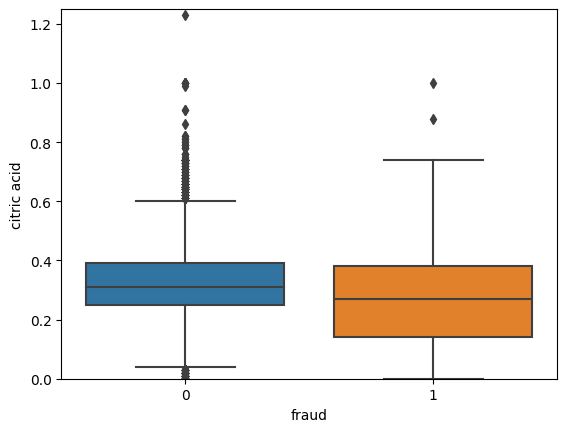

In [64]:
sns.boxplot(data=df, x='fraud', y='citric acid')
plt.ylim(0, 1.25)

<Axes: xlabel='volatile acidity', ylabel='chlorides'>

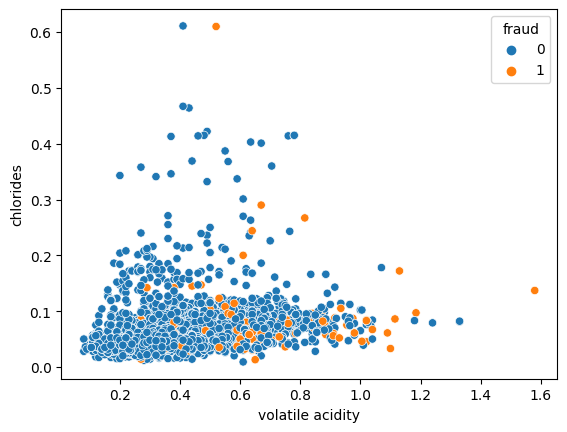

In [65]:
sns.scatterplot(data=df, x='volatile acidity', y='chlorides', hue='fraud')

## Particionamiento

In [66]:
df.head(1)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,fraud,type_white
0,7.4,0.7,0.0,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0,0


In [67]:
X = df.drop('fraud', axis=1)
y = df['fraud']

In [68]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42 )

### Regresión logística / Modelado

In [73]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.96      1.00      0.98      1251
           1       1.00      0.02      0.04        49

    accuracy                           0.96      1300
   macro avg       0.98      0.51      0.51      1300
weighted avg       0.96      0.96      0.95      1300



In [72]:
from sklearn.neighbors import KNeighborsClassifier

model = KNeighborsClassifier()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.96      1.00      0.98      1251
           1       0.00      0.00      0.00        49

    accuracy                           0.96      1300
   macro avg       0.48      0.50      0.49      1300
weighted avg       0.93      0.96      0.94      1300



## Balancear clases

* pip install imbalanced-learn

In [74]:
from imblearn.over_sampling import SMOTE

In [75]:
smote = SMOTE(random_state=42)

X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

In [77]:
print(f'original: {X_train.shape} {y_train.shape}')
print(f'resampled: {X_train_res.shape} {y_train_res.shape}')

original: (5197, 12) (5197,)
resampled: (10000, 12) (10000,)


In [81]:
model = LogisticRegression(max_iter=10000)
model.fit(X_train_res, y_train_res)

y_pred = model.predict(X_test)

print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.98      0.72      0.83      1251
           1       0.08      0.63      0.14        49

    accuracy                           0.72      1300
   macro avg       0.53      0.68      0.49      1300
weighted avg       0.95      0.72      0.80      1300



In [80]:
model = KNeighborsClassifier()
model.fit(X_train_res, y_train_res)

y_pred = model.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.98      0.83      0.89      1251
           1       0.10      0.47      0.16        49

    accuracy                           0.81      1300
   macro avg       0.54      0.65      0.53      1300
weighted avg       0.94      0.81      0.87      1300

